# <font color='red'>BackPropagation</font>

**There will be some functions that start with the word "grader" ex: grader_sigmoid(), grader_forwardprop(), grader_backprop() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

## <font color='red'>Loading data </font>

In [1]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


# <font color='red'>Computational graph</font>

<img src='https://i.imgur.com/seSGbNS.png'>


*  **If you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]**.<br><br>
*  **The final output of this graph is a value L which is computed as (Y-Y')^2** 

# <font color='red'>Task 1: Implementing backpropagation and Gradient checking </font>

<font color='blue'><b>Check this video for better understanding of the computational graphs and back propagation</font>

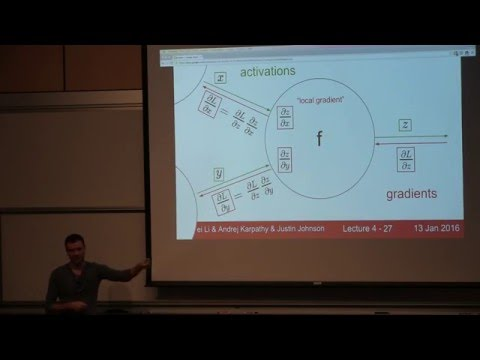

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('i94OvYb6noo',width="1000",height="500")


*  <b>Write two functions<br>
    *  Forward propagation</b>(Write your code in<font color='blue'> def forward_propagation()</b></font>)<br><br>
    For easy debugging, we will break the computational graph into 3 parts.

    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

    <pre>
    <font color='green'>
def forward_propagation(X, y, W):
        <font color='grey'>
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph, <br>         ..., W[8] corresponds to w9 in graph.  
        # you have to return the following variables
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        # now compute remaining values from computional graph and get y'
        # write code to compute the value of L=(y-y')^2
        # compute derivative of L  w.r.to Y' and store it in dl
        # Create a dictionary to store all the intermediate values
        # store L, exp,tanh,sig,dl variables
        </font>
        return (dictionary, which you might need to use for back propagation)
        <font color='grey'>
        </font>
</font>
</pre>
    *  <b>Backward propagation</b>(Write your code in<font color='blue'> def backward_propagation()</b></font>)
    </b>
    <pre>
    <font color='green'>
    def backward_propagation(L, W,dictionary):
        <font color='grey'>
        # L: the loss we calculated for the current point
        # dictionary: the outputs of the forward_propagation() function
        # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
        # Hint: you can use dict type to store the required variables 
        # return dW, dW is a dictionary with gradients of all the weights
        </font>
        return dW
        </font>
</font>
</pre>

 ## <font color='red'>Gradient clipping</font>

<b> Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping

**Algorithm** 



<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):<font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()</font>
    approx_gradients = []
    for each wi weight value in W:<font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi</font>
        approx_gradients.append(approximation gradients of weight wi)<font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with <br>  gradient_check formula</font>
    return gradient_check</font>
<b>NOTE: you can do sanity check by checking all the return values of gradient_checking(),<br> they have to be zero. if not you have bug in your code
</pre></b>

# <font color='red'> Task 2 : Optimizers </font>

* As a part of this task, you will be implementing 3 type of optimizers(methods to update weight)
* Use the same computational graph that was mentioned above to do this task
* Initilze the 9 weights from normal distribution with mean=0 and std=0.01

**Check below video and <a href='https://cs231n.github.io/neural-networks-3/'>this</a> blog**

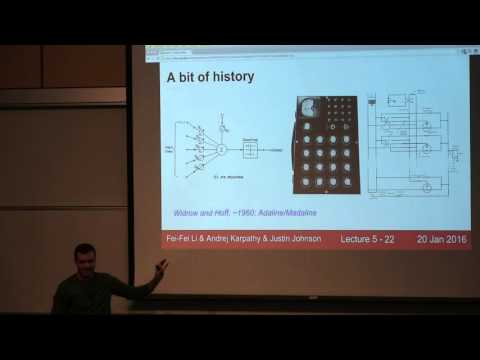

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('gYpoJMlgyXA',width="1000",height="500")

<font color='blue'><b>Algorithm</b>

<pre>
    for each epoch(1-100):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  ex: w1 = w1-learning_rate*dw1
</pre>

## <font color='red'> Implement below tasks</b>


*  <b>Task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights<br><br>
*  <b>Task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights<br><br>
*  <b>Task 2.3</b>: you will be implementing the above algorithm with <b>Adam update</b> of weights


**Note : If you get any assertion error while running grader functions, please print the variables in grader functions and check which variable is returning False .Recheck your logic for that variable .**

<br>
<br>
<br>

# <font color='red'>Task 1 </font>

## <font color='blue'>Forward propagation </font>

In [4]:
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation
    return 1 / (1 + np.exp(-z))
    
def forward_propagation(x, y, w):
    '''In this function, we will compute the forward propagation '''
    # X: input data point, note that in this assignment you are having 5-d data points
    # y: output varible
    # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph,..., W[8] corresponds to w9 in graph.  
    # you have to return the following variables
    # exp= part1 (compute the forward propagation until exp and then store the values in exp)
    # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
    # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
    # now compute remaining values from computional graph and get y'
    # write code to compute the value of L=(y-y')^2
    # compute derivative of L  w.r.to Y' and store it in dl
    # Create a dictionary to store all the intermediate values
    # store L, exp,tanh,sig variables
    t     = np.dot(w[0], x[ 0]) +  np.dot(w[1], x[ 1])
    exp   = np.exp(np.dot(t,t) + w[5])
    tanh  = np.tanh(exp + w[6])
    sig   = sigmoid(w[7] + (np.dot(np.sin(np.dot(w[2], x[ 2])) , np.dot(w[3], x[ 3]) + np.dot(w[4], x[ 4]) )))
    y_hat = np.dot(sig, w[8]) + tanh
    l     = (y-y_hat) ** 2  
    dl    =  -2 * (y - y_hat)
    return {'dl':dl,'loss':l, 'exp':exp, 'tanh':tanh, 'sigmoid':sig, 'x':x}

<font color='cyan'>Grader function - 1</font>

In [5]:
def grader_sigmoid(z):
    val=sigmoid(z)
    assert(val==0.8807970779778823)
    return True
grader_sigmoid(2)

True

<font color='cyan'>Grader function - 2 </font>

In [8]:
def grader_forwardprop(data):
    dl = (np.round(data['dl'],4)==-1.9285)
    loss=(np.round(data['loss'],4)==0.9298)
    part1=(np.round(data['exp'],4)==1.1273)
    part2=(np.round(data['tanh'],4)==0.8418)
    part3=(np.round(data['sigmoid'],4)==0.5279)
    assert(dl and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

True

## <font color='blue'>Backward propagation</font>

In [9]:
def backward_propagation(L,W,dicts):
    '''In this function, we will compute the backward propagation '''
    # L: the loss we calculated for the current point
    # dictionary: the outputs of the forward_propagation() function
    # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
    # Hint: you can use dict type to store the required variables 
    # dw1 = # in dw1 compute derivative of L w.r.to w1
    # dw2 = # in dw2 compute derivative of L w.r.to w2
    # dw3 = # in dw3 compute derivative of L w.r.to w3
    # dw4 = # in dw4 compute derivative of L w.r.to w4
    # dw5 = # in dw5 compute derivative of L w.r.to w5
    # dw6 = # in dw6 compute derivative of L w.r.to w6
    # dw7 = # in dw7 compute derivative of L w.r.to w7
    # dw8 = # in dw8 compute derivative of L w.r.to w8
    # dw9 = # in dw9 compute derivative of L w.r.to w9
    
    dw = {}
    dw['dw1'] = dicts['dl'] * 2 * dicts['x'][0] * dicts['exp'] * (np.dot(W[0], dicts['x'][0]) + np.dot(W[1], dicts['x'][1])) * (1 - (dicts['tanh']**2))
    dw['dw2'] = dicts['dl'] * 2 * dicts['x'][1] * dicts['exp'] * (np.dot(W[0], dicts['x'][0]) + np.dot(W[1], dicts['x'][1])) * (1 - (dicts['tanh']**2))
    dw['dw3'] = dicts['dl'] * dicts['x'][2] * W[8] * np.cos(np.dot(W[2], dicts['x'][2])) * (np.dot(W[4], dicts['x'][4]) + np.dot(W[3], dicts['x'][3])) * dicts['sigmoid'] * (1 - dicts['sigmoid'])
    dw['dw4'] = dicts['dl'] * dicts['x'][3] * W[8] * np.sin(np.dot(W[2], dicts['x'][2])) * dicts['sigmoid'] * (1 - dicts['sigmoid'])
    dw['dw5'] = dicts['dl'] * dicts['x'][4] * W[8] * np.sin(np.dot(W[2], dicts['x'][2])) * dicts['sigmoid'] * (1 - dicts['sigmoid'])
    dw['dw6'] = dicts['dl'] * dicts['exp'] * (1 - (dicts['tanh']**2))
    dw['dw7'] = dicts['dl'] * (1 - (dicts['tanh']**2))
    dw['dw8'] = dicts['dl'] * W[8] * dicts['sigmoid'] * (1 - dicts['sigmoid'])
    dw['dw9'] = dicts['dl'] * dicts['sigmoid']

    return dw
    # return dW, dW is a dictionary with gradients of all the weights

<font color='cyan'>Grader function - 3 </font>

In [10]:
def grader_backprop(data):
    dw1=(np.round(data['dw1'],8)==-0.22973323)
    dw2=(np.round(data['dw2'],8)==-0.02140761)
    dw3=(np.round(data['dw3'],8)==-0.00562541)
    dw4=(np.round(data['dw4'],8)==-0.00465794)
    dw5=(np.round(data['dw5'],8)==-0.00100772)
    dw6=(np.round(data['dw6'],8)==-0.63347519)
    dw7=(np.round(data['dw7'],8)==-0.56194184)
    dw8=(np.round(data['dw8'],8)==-0.04806288)
    dw9=(np.round(data['dw9'],8)==-1.01810444)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
d1=backward_propagation(X[0],w,d1)
grader_backprop(d1)

True

## <font color='blue'> Implement gradient checking</font>

In [18]:
W = np.ones(9)*0.1
def gradient_checking(data_point, W):   
    x_train = data_point[:5]
    y_train = data_point[-1]
    
    forward_result = forward_propagation(x_train, y_train, W)
    backward_result = backward_propagation(x_train, W, forward_result)
    delta = 10 ** -7 
    
    approx_gradient = {}
    gradient_checking = {}
    for ind in range(W.shape[0]):
        temp_w_i = temp_w_ii = W
        temp = W[ind]
        temp_w_i[ind] = temp  + delta
        forward_result_i  = forward_propagation(x_train, y_train, temp_w_i)
        backward_result_i = backward_propagation(x_train, temp_w_i, forward_result_i)
        
        temp_w_ii[ind] = temp  - delta
        forward_result_ii  = forward_propagation(x_train, y_train, temp_w_ii)
        backward_result_ii = backward_propagation(x_train, temp_w_i, forward_result_ii)
        approx_gradient['dw{}'.format(ind+1)] = (forward_result_i['loss'] - forward_result_ii['loss'])/( 2 * delta)
    for key in backward_result.keys():
        gradient_checking[key] = (backward_result[key] - approx_gradient[key]) /  (backward_result[key] + approx_gradient[key])
    return gradient_checking



grad = gradient_checking(data[0], W)
print(grad)

{'dw1': -4.918867403857781e-10, 'dw2': 4.313072065448279e-07, 'dw3': -5.96991379072821e-08, 'dw4': 5.328311462684123e-07, 'dw5': 5.785228848348613e-07, 'dw6': -2.4944672635960616e-08, 'dw7': -1.5675493248917714e-07, 'dw8': -3.6260816099250785e-08, 'dw9': -1.1321577367826861e-08}


# <font color='red'>Task 2: Optimizers

### <font color='blue'>Algorithm with Vanilla update of weights</font>

In [67]:
# Setting Up Constants
# Setting Fixed Seeding for better and replicable results
np.random.seed(42) 

# Mean of Normal Distribution of weights
mu = 0 

# Variance of Normal Distribution of weights
sigma = 0.1

# Learning Rate 
eta = 0.1

# Creating a Normal Distribution of Weights
W = sigma * np.random.randn(9) + mu 

# Creating list to capture loss
loss = []

# For Each Epoch
for epoch in range(0,100):
    
    # Copying Weights to calculate convergence
    temp = np.copy(W)
    # Creating list to capture at each datapoint loss
    temp_loss = []
    
    print('Executing Epoch {}'.format(epoch))
    
    # Looping over each datapoint
    for x_train, y_train in zip(data[:, :5], data[:, -1]):
        # Calculate Forward Propagation         
        forward_result  = forward_propagation(x_train, y_train, W)
        # Calculate Backward Propagation
        backward_result = backward_propagation(x_train, W, forward_result)
        # Capturing Loss
        temp_loss.append(forward_result['loss'])
        
        # Updating Each Set of Weights
        for ind, key in enumerate(backward_result.keys()):
            W[ind] = W[ind] - eta * backward_result[key]
    
    # Checking for convergence     
    if np.where(W - temp > 10 ** -3)[0].shape[0] == 0:
        print('\n')
        print("-"*100)
        print('Weigths Have Converged')
        print("-"*100)
        break
    
    # Calculating mean loss for each epoch 
    loss.append(np.mean(temp_loss))

Executing Epoch 0
Executing Epoch 1
Executing Epoch 2
Executing Epoch 3
Executing Epoch 4
Executing Epoch 5
Executing Epoch 6
Executing Epoch 7
Executing Epoch 8
Executing Epoch 9
Executing Epoch 10
Executing Epoch 11
Executing Epoch 12
Executing Epoch 13
Executing Epoch 14
Executing Epoch 15
Executing Epoch 16
Executing Epoch 17
Executing Epoch 18
Executing Epoch 19
Executing Epoch 20
Executing Epoch 21
Executing Epoch 22
Executing Epoch 23
Executing Epoch 24
Executing Epoch 25
Executing Epoch 26
Executing Epoch 27
Executing Epoch 28
Executing Epoch 29
Executing Epoch 30
Executing Epoch 31
Executing Epoch 32
Executing Epoch 33
Executing Epoch 34
Executing Epoch 35
Executing Epoch 36
Executing Epoch 37
Executing Epoch 38
Executing Epoch 39
Executing Epoch 40
Executing Epoch 41
Executing Epoch 42
Executing Epoch 43
Executing Epoch 44
Executing Epoch 45
Executing Epoch 46
Executing Epoch 47
Executing Epoch 48
Executing Epoch 49
Executing Epoch 50
Executing Epoch 51
Executing Epoch 52
Exe

<font color='blue'>Plot between epochs and loss</font>

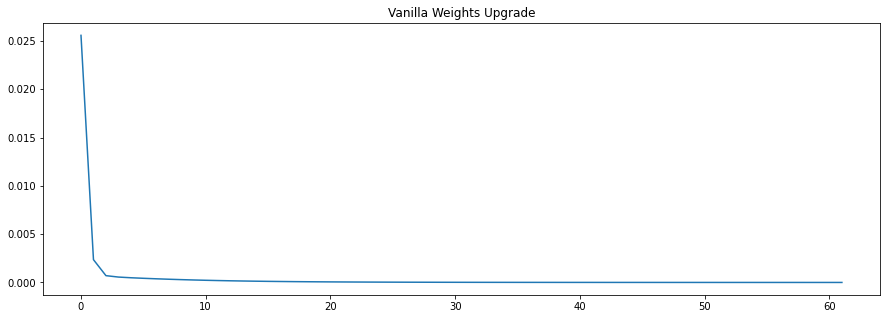

In [68]:
_, ax = plt.subplots(1, 1, figsize=(15,5))
ax.plot(loss)
ax.set_title('Vanilla Weights Upgrade')
plt.show()

vanilla_loss = loss

### <font color='blue'>Algorithm with Momrentum update of weights</font>

In [69]:
# Setting Up Constants
# Setting Fixed Seeding for better and replicable results
np.random.seed(42)
# Mean 
mu = 0

#  Standard Deviation
sigma = 0.1

# Learning Rate
eta = 0.1
# Gamma for momentum
gamma = 0.9

# Calculating weighs from a Normal Distribution
W = sigma * np.random.randn(9) + mu

loss = []

for epoch in range(0,100):
    # Copy Weigts for convergence evaluation
    temp = np.copy(W)
    temp_loss = []
    print('Executing Epoch {}'.format(epoch))
    
    # Place holder for capturing all the momentum values
    v = {}
    for t, points in enumerate(zip(data[:, :5], data[:, -1])):
        x_train = points[0]
        y_train = points[1]
        # Forward Propagation 
        forward_result  = forward_propagation(x_train, y_train, W)
        # Backward Propagation
        backward_result = backward_propagation(x_train, W, forward_result)
        # Calculating loss for each data point
        temp_loss.append(forward_result['loss'])
        # Weights Updation         
        for ind, key in enumerate(backward_result.keys()):
            if t not in v.keys():
                v[t] = {}
            if t == 0:
                # Storing values of momentum to be used for the next iteration
                v[t][key] = eta * backward_result[key]
            else:
                # Storing values of momentum to be used for the next iteration
                v[t][key] = gamma * v[t-1][key] + eta * backward_result[key]
            
            # Updating Weights Using Momentum
            W[ind] = W[ind] - v[t][key]
    # Checking for convergence    
    if np.where(W - temp > 10 ** -3)[0].shape[0] == 0:
        print('\n')
        print("-"*100)
        print('Weigths Have Converged')
        print("-"*100)
        break
    loss.append(np.mean(temp_loss))

Executing Epoch 0
Executing Epoch 1
Executing Epoch 2
Executing Epoch 3
Executing Epoch 4
Executing Epoch 5
Executing Epoch 6
Executing Epoch 7
Executing Epoch 8
Executing Epoch 9
Executing Epoch 10
Executing Epoch 11
Executing Epoch 12
Executing Epoch 13
Executing Epoch 14
Executing Epoch 15
Executing Epoch 16
Executing Epoch 17
Executing Epoch 18
Executing Epoch 19
Executing Epoch 20
Executing Epoch 21
Executing Epoch 22
Executing Epoch 23
Executing Epoch 24
Executing Epoch 25
Executing Epoch 26
Executing Epoch 27


----------------------------------------------------------------------------------------------------
Weigths Have Converged
----------------------------------------------------------------------------------------------------


<font color='blue'>Plot between epochs and loss</font>

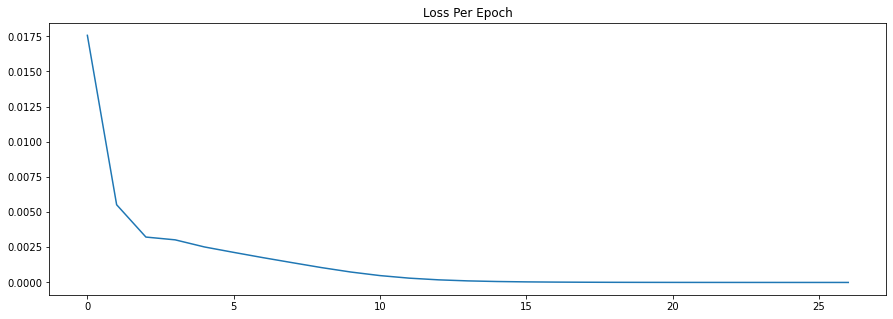

In [70]:
_, ax = plt.subplots(1, 1, figsize=(15,5))
ax.plot(loss)
ax.set_title('Loss Per Epoch')
plt.show()

momentum_loss = loss

### <font color='blue'>Algorithm with Adam update of weights</font>

In [100]:
# Setting Up Constants
# Setting Fixed Seeding for better and replicable results
np.random.seed(42)
# Mean 
mu = 0

#  Standard Deviation
sigma = 0.1

# Learning Rate
eta = 0.1

# Calculating weights from a Normal Distribution
W = sigma * np.random.randn(9) + mu

loss = []

beta={1:0.9, 2:0.99}

alpha = 0.001
epsilon = 10 ** -7

for epoch in range(0,100):
    # Copy Weigts for convergence evaluation
    temp = np.copy(W)
    temp_loss = []
    print('Executing Epoch {}'.format(epoch))
    print(W)
    # Place holder for capturing all the momentum values
    v = {}
    m = {}
    for t, points in enumerate(zip(data[:, :5], data[:, -1])):
        x_train = points[0]
        y_train = points[1]
        # Forward Propagation 
        forward_result  = forward_propagation(x_train, y_train, W)
        # Backward Propagation
        backward_result = backward_propagation(x_train, W, forward_result)
        # Calculating loss for each data point
        temp_loss.append(forward_result['loss'])
        # Weights Updation
        m_cap = {}
        v_cap = {}
        m[t] = {}
        v[t] = {}
        for ind, key in enumerate(backward_result.keys()):
            
            if key not in m.keys():
                m[t][key] = {}
                v[t][key] = {}
            # Exponential Decaying Average
            if t == 0:
                m[t][key] = (1-beta[1]) * backward_result[key]
                v[t][key] = (1-beta[2]) * (backward_result[key] ** 2)
                
            else:
                m[t][key] = (beta[1] * m[t-1][key]) + ((1-beta[1]) * backward_result[key])
                v[t][key] = (beta[2] * v[t-1][key]) + ((1-beta[2]) * (backward_result[key] ** 2))
            
            # Bias Correction 
            m_cap[key] = m[t][key]/(1-(beta[1] ** 2))
            v_cap[key] = v[t][key]/(1-(beta[1] ** 2))
            
            # Updating Weights Using Momentum
            
            W[ind] = W[ind] - ((alpha * m_cap[key])/((np.sqrt(v_cap[key]))+epsilon))
  
    # Checking for convergence    
    if np.where(W - temp > 10 ** -2)[0].shape[0] == 0:
        print('\n')
        print("-"*100)
        print('Weigths Have Converged')
        print("-"*100)
        break

    loss.append(np.mean(temp_loss))

Executing Epoch 0
[ 0.04967142 -0.01382643  0.06476885  0.15230299 -0.02341534 -0.0234137
  0.15792128  0.07674347 -0.04694744]
Executing Epoch 1
[ 0.67253833  0.26039121 -0.75599003 -0.71208851 -0.68629166  0.45414311
  0.55713967  1.14462593  0.99733857]
Executing Epoch 2
[ 0.71668682  0.17841498 -1.02483006 -0.99369323 -1.02768891  0.56922
  0.67514454  1.05145805  1.00588215]
Executing Epoch 3
[ 0.7550966   0.02637095 -0.99341282 -1.00774675 -1.02183591  0.70730048
  0.81646929  1.02196702  1.00079792]
Executing Epoch 4
[ 0.77917404  0.04504284 -1.00756625 -1.0060123  -1.00276255  0.76285014
  0.87641409  1.01920124  1.0039031 ]
Executing Epoch 5
[ 0.78590844  0.0109296  -0.99752301 -1.00920052 -1.00810754  0.81650671
  0.9364778   1.00893415  1.00518362]
Executing Epoch 6
[ 0.83864996 -0.02488791 -1.00604472 -1.00327221 -1.01813819  0.86066361
  0.9801075   0.99788298  1.00469309]
Executing Epoch 7
[ 0.76945744  0.09907162 -1.0015239  -0.97801338 -0.99057862  0.84961851
  0.975915

<font color='blue'>Plot between epochs and loss</font>

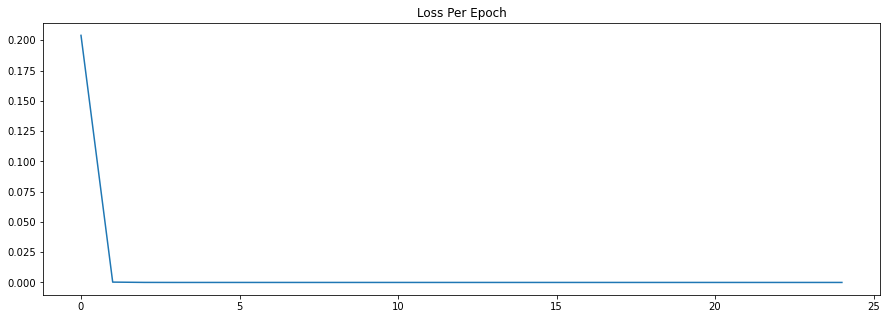

In [101]:
_, ax = plt.subplots(1, 1, figsize=(15,5))
ax.plot(loss)
ax.set_title('Loss Per Epoch')
plt.show()

adam_loss = loss

<font color='blue'>Comparision plot between epochs and loss with different optimizers</font>

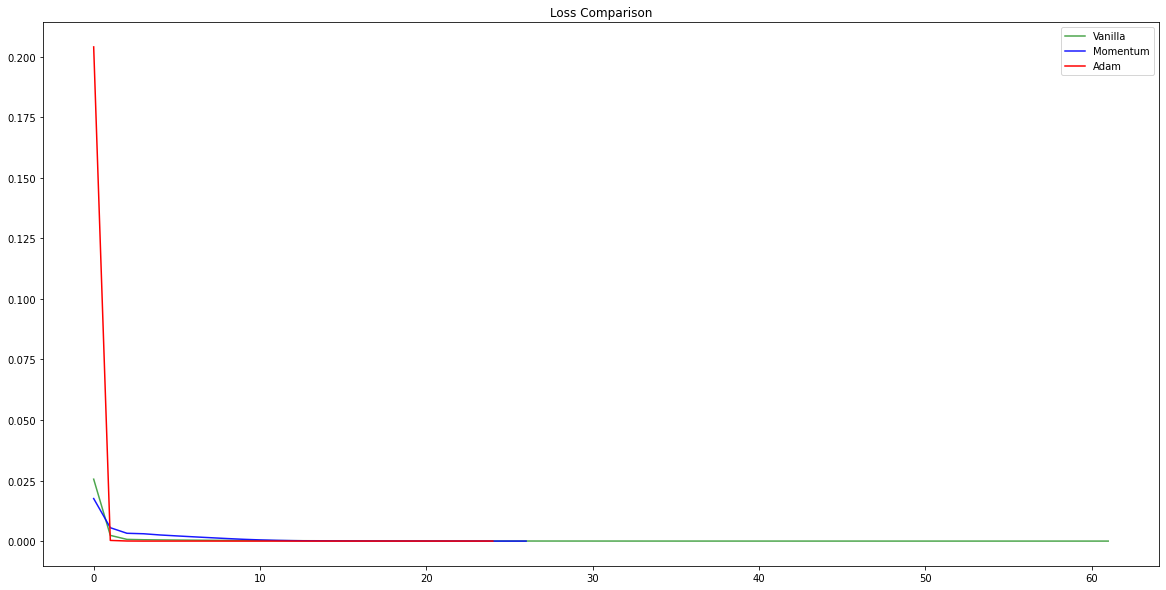

In [102]:
_, ax = plt.subplots(1, 1, figsize=(20,10))
ax.plot(vanilla_loss, label='Vanilla',color='Green', alpha=0.7)
ax.plot(momentum_loss, label='Momentum',color='Blue', alpha=0.9)
ax.plot(adam_loss, label='Adam',color='Red')
ax.set_title('Loss Comparison')
ax.legend()
plt.show()

